In [178]:
import os
import random
import re
import string
import sys
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

sys.path.insert(1, '../python/')

import config as cnf


In [15]:
df = pd.read_csv("../data/ucr_data/UCRArchive_2018/ItalyPowerDemand/ItalyPowerDemand_TRAIN.tsv",
                sep='\t', header=None)

In [9]:
!cat ../data/ucr_data/UCRArchive_2018/ItalyPowerDemand/README.md

# ItalyPowerDemand

The data were derived from twelve monthly electrical power demand time series of Italy and first used in [1]. The classification task is to distinguish days from Oct to March (inclusive) and from April to September.

Train size: 67

Test size: 1029

Missing value: No

Number of classses: 2

Time series length: 24

Data donated by Eamonn Keogh and Li Wei (see [1], [2]).

[1] Keogh, Eamonn, et al. "Intelligent icons: Integrating lite-weight data mining and visualization into GUI operating systems." Data Mining, 2006. ICDM'06. Sixth International Conference on. IEEE, 2006.

[2] http://www.timeseriesclassification.com/description.php?Dataset=ItalyPowerDemand

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,-0.710518,-1.183320,-1.372442,-1.593083,-1.467002,-1.372442,-1.088760,0.045967,0.928532,...,-0.647477,-0.269235,-0.206195,0.613330,1.369815,1.464375,1.054613,0.581810,0.172048,-0.269235
1,1,-0.993009,-1.426786,-1.579884,-1.605401,-1.630917,-1.375754,-1.018526,-0.355102,0.716583,...,0.486936,0.563485,0.614518,0.308322,0.257289,1.099327,1.048295,0.691066,-0.048906,-0.380618
2,2,1.319067,0.569774,0.195128,-0.085856,-0.179518,-0.273180,-0.085856,-1.397118,-1.116134,...,-0.554164,-0.741487,-0.741487,-0.741487,-1.116134,-0.460503,0.476113,2.349344,2.255682,1.600052
3,2,-0.812444,-1.157553,-1.416385,-1.531421,-1.502662,-1.416385,-1.646458,-0.467335,0.654269,...,0.740547,0.884342,0.884342,0.683028,0.625510,0.424197,-0.007190,-0.035949,0.107847,-0.266022
4,1,-0.972840,-1.390518,-1.536705,-1.620240,-1.620240,-1.453169,-0.993724,0.050469,0.635218,...,0.321960,0.489031,0.614334,1.303502,1.240850,1.073779,0.551682,0.426379,-0.179253,-0.638698


### Join all relevant files

In [56]:
re.match?

Signature: re.match(pattern, string, flags=0)
Docstring:
Try to apply the pattern at the start of the string, returning
a Match object, or None if no match was found.
File:      ~/anaconda3/lib/python3.7/re.py
Type:      function


In [62]:
for root, dirs, files in os.walk("../data/ucr_data/UCRArchive_2018/"):
    for name in files:
        if(name.endswith("_TRAIN.tsv")):
            folders = re.split("/", root)
            ts_name = folders[-1]
#             print(re.match("\/([^\/]+)\/?$", root))

In [67]:
ts_infos = []
for root, dirs, files in os.walk("../data/ucr_data/UCRArchive_2018/"):
    for name in files:
        if(name.endswith("_TRAIN.tsv")):
            path_tmp = os.path.join(root,name)
            ts_name = re.split("/", root)[-1]
            ts_infos.append((ts_name, os.path.join(root,name)))
            
ts_infos[:10]


[('Haptics', '../data/ucr_data/UCRArchive_2018/Haptics/Haptics_TRAIN.tsv'),
 ('SyntheticControl',
  '../data/ucr_data/UCRArchive_2018/SyntheticControl/SyntheticControl_TRAIN.tsv'),
 ('Worms', '../data/ucr_data/UCRArchive_2018/Worms/Worms_TRAIN.tsv'),
 ('Computers',
  '../data/ucr_data/UCRArchive_2018/Computers/Computers_TRAIN.tsv'),
 ('HouseTwenty',
  '../data/ucr_data/UCRArchive_2018/HouseTwenty/HouseTwenty_TRAIN.tsv'),
 ('GestureMidAirD3',
  '../data/ucr_data/UCRArchive_2018/GestureMidAirD3/GestureMidAirD3_TRAIN.tsv'),
 ('Chinatown',
  '../data/ucr_data/UCRArchive_2018/Chinatown/Chinatown_TRAIN.tsv'),
 ('UWaveGestureLibraryAll',
  '../data/ucr_data/UCRArchive_2018/UWaveGestureLibraryAll/UWaveGestureLibraryAll_TRAIN.tsv'),
 ('Strawberry',
  '../data/ucr_data/UCRArchive_2018/Strawberry/Strawberry_TRAIN.tsv'),
 ('Car', '../data/ucr_data/UCRArchive_2018/Car/Car_TRAIN.tsv')]

In [76]:
df = pd.DataFrame()

for ts_info in tqdm(ts_infos):
    ts_name = ts_info[0]
    fp = ts_info[1]
    
    df_tmp = pd.read_csv(fp, sep='\t', header=None)
    df_tmp['name'] = ts_name
    cols = df_tmp.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)

  0%|          | 0/143 [00:00<?, ?it/s]

In [84]:
random.randint(0, 100) for 

Signature: random.randint(a, b)
Docstring:
Return random integer in range [a, b], including both end points.
        
File:      ~/anaconda3/lib/python3.7/random.py
Type:      method


In [89]:
?random.randrange?

Signature: random.randrange(start, stop=None, step=1, _int=<class 'int'>)
Docstring:
Choose a random item from range(start, stop[, step]).

This fixes the problem with randint() which includes the
endpoint; in Python this is usually not what you want.
File:      ~/anaconda3/lib/python3.7/random.py
Type:      method


In [95]:
list(np.random.randint(0, 100, 4))

[53, 9, 14, 44]

In [102]:
random.randint(0,1000)

139

In [112]:
df = pd.DataFrame()
for i in range(5):
    
    name = random.choice(['A','B'])
    type_cls = random.randint(1,2)
    val1 = random.randint(0,1000)
    val2 = random.randint(0,1000)
    val3 = random.randint(0,1000)
    val4 = random.randint(0,1000)
    val5 = random.randint(0,1000)
    
    df_tmp = pd.DataFrame([[name,type_cls,val1,val2,val3,val4,val5]], columns=['name', 'class', 1,2,3,4,5])

    df = df.append(df_tmp)
    
df 

,name,class,1,2,3,4,5
0,B,1,9,486,904,168,399
0,B,2,40,954,889,112,818
0,A,2,897,871,375,640,54
0,A,1,261,847,736,266,501
0,B,1,869,144,925,782,438


## Reviewing Results

In [98]:
df_matches = pd.read_csv("../data/df_ucr_match_scores_samples.csv")
df_matches['class_1'] = df_matches['class_1'].astype(int)
df_matches['class_2'] = df_matches['class_2'].astype(int)

In [99]:
df_matches.head()

,ts_1,no_1,ts_2,no_2,type,match_score,d_m,d_mean,d_std,d_count,d_q25,d_q50,d_q75,class_1,class_2,d_min,d_max
0,Chinatown,146,ElectricDevices,5835,Hamming,11100,72,561.125000,454.434352,210.899120,77.970417,465.720417,1040.720417,2,5835,25.220417,1227.390613
1,Chinatown,146,ElectricDevices,6600,Hamming,11100,72,561.125000,454.434352,211.379193,78.141848,465.891848,1040.891848,2,6600,25.391848,1230.898799
2,Chinatown,179,Chinatown,13,Hamming,11100,0,123.250000,92.145307,28.498932,34.000000,154.000000,251.750000,2,13,8.000000,373.000000
3,Chinatown,179,ElectricDevices,7710,Hamming,11100,72,668.041667,562.594055,205.819865,99.903466,556.660284,1267.568466,2,7710,14.653466,1640.762561
4,Chinatown,179,ElectricDevices,7713,Hamming,11100,72,668.041667,562.594055,205.444015,100.041971,557.023317,1267.180044,2,7713,14.926299,1645.165134


## Loading Time Series

In [33]:
def read_filepaths(run_mode: str = 'train',
                  filepath: str=cnf.UCR_FP) -> Tuple[str,str]:
    if run_mode == "train":
        suffix = cnf.UCR_TRAIN_NAME
    else:
        suffix = cnf.UCR_TEST_NAME
    
    ts_infos = []    
    for root, dirs, files in os.walk(filepath):
        for name in files:
            if (name.endswith(suffix)):
                path_tmp = os.path.join(root,name)
                ts_name = re.split("/", root)[-1]
                ts_infos.append((ts_name,path_tmp))

    return ts_infos

def read_ucr_csv(ts_info: Tuple[str, str]) -> pd.DataFrame:
    ts_name = ts_info[0]
    fp = ts_info[1]

    df = pd.read_csv(fp, sep="\t", header=None)
    df['name'] = ts_name
    df['no'] = df.index.values
    cols = df.columns.tolist()
    cols = cols[-2:] + cols[:-2]
    df = df[cols]
    return df

In [34]:
ts_infos = read_filepaths()

In [37]:
df_l = []
for ts_info in ts_infos:
    df_l.append(read_ucr_csv(ts_info))
    
df_ts = pd.concat(df_l)

In [38]:
df_ts.head()

,name,no,0,1,2,3,4,5,6,7,...,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844
0,Haptics,0,5,-1.047477,0.548336,-0.259562,-1.581216,-1.915218,-1.278188,-0.691525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Haptics,1,2,-1.018153,0.514133,-0.097370,-1.374493,-1.957364,-1.567188,-0.906353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Haptics,2,4,-1.183382,0.339636,0.045998,-1.080209,-1.934357,-1.972025,-1.412721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Haptics,3,3,-0.896969,0.186145,0.578290,0.392361,-0.157240,-0.818047,-1.374046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Haptics,4,5,-1.009424,0.614673,-0.397552,-1.766144,-1.906942,-1.145026,-0.717200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Random Choice of TS

In [40]:
df_matches['ts_1'].unique()

128

In [43]:
rng = default_rng()

In [62]:
sample_name = rng.choice(df_matches['ts_1'].unique())
sample_no = rng.choice(df_matches[df_matches['ts_1']==sample_name]['no_1'].unique())

df_matches[(df_matches['ts_1']==sample_name)&\
          (df_matches['no_1']==sample_no)]

,ts_1,no_1,ts_2,no_2,type,match_score,d_m,d_mean,d_std,d_count,d_q25,d_q50,d_q75,class_1,class_2,d_min,d_max
26204,FaceFour,78,ECG5000,49,Hamming,11010,210,1.006829e-09,0.002148,0.027679,0.182979,0.401693,0.264154,3.0,49,1.803183,1.803183
26205,FaceFour,78,ECG5000,92,Hamming,11010,210,1.320886e-09,0.002148,0.438912,0.121801,0.355891,0.339681,3.0,92,3.299770,3.299770
26206,FaceFour,78,ECG5000,291,Hamming,11010,210,5.126858e-10,0.002148,0.797035,0.083701,0.245060,0.371643,3.0,291,2.417952,2.417952
26207,FaceFour,78,LargeKitchenAppliances,176,Hamming,11001,370,6.981477e-10,0.000735,0.272163,0.396985,0.075594,0.279079,3.0,176,1.775660,1.775660
26208,FaceFour,78,MedicalImages,86,Hamming,11010,251,9.236466e-11,0.003634,0.037726,0.089093,0.042081,0.010818,3.0,86,0.731771,0.731771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8303189,FaceFour,78,Wine,45,fft,11001,116,2.705193e-10,0.000709,0.029147,0.010529,0.152891,0.112821,3.0,45,0.000734,0.000734
8303190,FaceFour,78,Wine,46,fft,11001,116,3.875418e-11,0.000709,0.028745,0.011261,0.153569,0.110645,3.0,46,0.003846,0.003846
8303191,FaceFour,78,Wine,47,fft,11001,116,7.626844e-13,0.000709,0.030676,0.011599,0.154959,0.112034,3.0,47,0.006357,0.006357
8303192,FaceFour,78,Wine,51,fft,11001,116,1.950065e-10,0.000709,0.013085,0.002934,0.142534,0.100124,3.0,51,0.003068,0.003068


In [77]:
df_matches['match_score'].unique()

array([11100, 11110, 11010, 11001, 11101, 11111, 11011])

In [78]:
ms_l = [11111, 11110, 11101]

In [87]:
cond1 = df_matches['ts_1']==df_matches['ts_2']
cond2 = df_matches['no_1']==df_matches['no_2']

In [81]:
df_reduced = df_reduced[cond1 & cond2]

/Users/philipp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [88]:
df_reduced['match_score'].unique()

array([11110, 11111, 11101])

In [84]:
df_f_match = df_reduced[df_reduced['match_score']==11111]

In [86]:
df_f_match.head()

,ts_1,no_1,ts_2,no_2,type,match_score,d_m,d_mean,d_std,d_count,d_q25,d_q50,d_q75,class_1,class_2,d_min,d_max
42946,MiddlePhalanxOutlineCorrect,206,MiddlePhalanxOutlineCorrect,206,Hamming,11111,0,1.475000e-09,4.352499e-09,0.011982,0.066602,0.032448,0.012964,0.0,206,0.043455,0.026824
51462,OliveOil,5,OliveOil,5,Hamming,11111,0,1.427016e-10,5.150960e-10,0.006925,0.000712,0.001377,0.002346,2.0,5,0.012553,0.001690
51492,OliveOil,15,OliveOil,15,Hamming,11111,0,1.108122e-09,2.703357e-09,0.010708,0.002532,0.001224,0.000828,3.0,15,0.012820,0.010610
51508,OliveOil,17,OliveOil,17,Hamming,11111,0,3.712277e-10,3.177798e-10,0.002451,0.000602,0.002363,0.000236,3.0,17,0.009149,0.019550
51555,OliveOil,27,OliveOil,27,Hamming,11111,0,5.554033e-10,6.693072e-10,0.000866,0.000500,0.004588,0.000453,4.0,27,0.000499,0.041186


## checking how many good combinations match the time series
- for 11111
- with each KPI the lowest

In [194]:
def find_lowest_delta(s: pd.Series, df_matches: pd.DataFrame)-> pd.DataFrame:
    df_match = df_matches[(df_matches['ts_1']==s['ts_1']) &\
              (df_matches['no_1']==s['no_1']) &
                         (df_matches['type']==s['type'])]
    max_f_match = df_match['match_score'].max()
    df_match = df_match[df_match['match_score']==max_f_match]
    
    df_res = pd.DataFrame()
    
    kpis = ['d_m', 'd_mean', 'd_std', 'd_q25', 'd_q50', 'd_q75', 'd_min', 'd_max'] # delta count is ignored b/c test is shorter than train
    
    # get lowest delta m
    for i in range(len(kpis)):
        kpi = kpis[i]
        min_series = df_match.sort_values(kpi).iloc[0,:]
        df_tmp = pd.DataFrame({
            'ts_1': s['ts_1'],
            'no_1': s['no_1'],
            'class_1': s['class_1'],
            'ts_2': min_series['ts_2'],
            'no_2': min_series['no_2'],
            'class_2': min_series['class_2'],
            'type': min_series['type'],
            'match_score': max_f_match,
            'min_kpi': kpi
        }, index=[i])
        df_res = df_res.append(df_tmp)
    return df_res
    

In [192]:
df_comb = pd.DataFrame(list(df_matches.set_index(['ts_1','no_1', 'class_1', 'type']).index.unique()), columns=['ts_1', 'no_1', 'class_1', 'type'])

In [195]:
df_comb.head()

,ts_1,no_1,class_1,type
0,Chinatown,146,2,Hamming
1,Chinatown,179,2,Hamming
2,Chinatown,283,2,Hamming
3,Chinatown,315,2,Hamming
4,Chinatown,335,2,Hamming


In [196]:
tqdm.pandas()

df_res = pd.concat(list(df_comb.progress_apply(func=find_lowest_delta, axis=1,
                 args=(df_matches,))))

  0%|          | 0/3530 [00:00<?, ?it/s]

In [139]:
df_comb.to_csv("../data/df_ucr_min_analysis.csv", index=False)

In [180]:
df_res.head()

,ts_1,no_1,class_1,ts_2,no_2,class_2,match_score,min_kpi
0,Chinatown,146,2,Chinatown,0,0,11111,d_m
1,Chinatown,146,2,Chinatown,0,0,11111,d_mean
2,Chinatown,146,2,Chinatown,17,17,11111,d_std
3,Chinatown,146,2,Chinatown,12,12,11111,d_q25
4,Chinatown,146,2,Chinatown,10,10,11111,d_q50


## Visualization
- count same series and which metric
- count same class and which metric

In [198]:
df_same_ts = df_res[(df_res['ts_1']==df_res['ts_2']) &\
      (df_res['no_1']==df_res['no_2'])]

df_same_class = df_res[(df_res['ts_1']==df_res['ts_2']) &\
      (df_res['class_1']==df_res['class_2'])]

In [200]:
df_same_ts.groupby('min_kpi').size()

min_kpi
d_m       14
d_max     12
d_mean    12
d_min     17
d_q25     14
d_q50     13
d_q75     17
d_std     19
dtype: int64

In [197]:
df_res.shape

(28240, 9)

ValueError: Could not interpret input 'match_score'

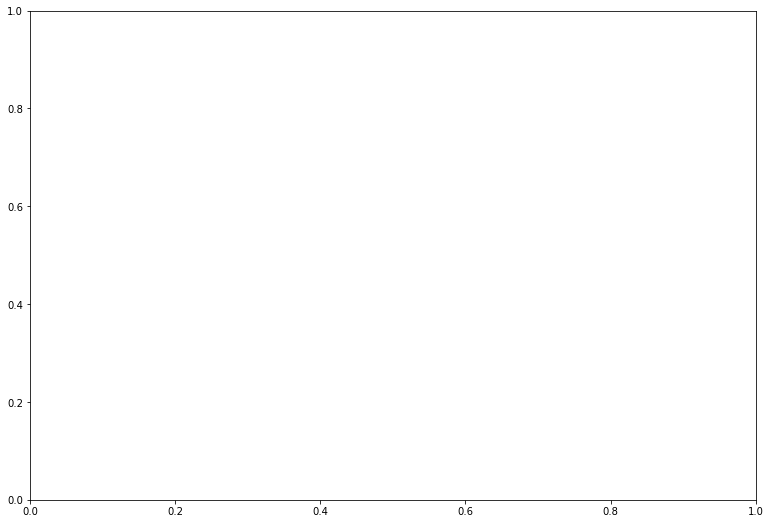

In [203]:
fig, ax = plt.subplots(figsize=(13,9))

ax = sns.barplot(df_same_ts, x='min_kpi', y='match_score')
